<a href="https://colab.research.google.com/github/Luciajantus/TelecomX-Analysis/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
datos = pd.read_json('TelecomX_Data.json')
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [ ]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
import json

with open('TelecomX_Data.json', 'r') as f:
  datos_crudos = json.load(f)

In [ ]:
datos = pd.json_normalize(datos_crudos)

In [ ]:
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
datos['account.Charges.Total'] = datos['account.Charges.Total'].str.strip()


In [ ]:
datos['account.Charges.Total'] = datos['account.Charges.Total'].replace('', np.nan)

In [ ]:
# para que los clientes nuevos (sin cargos aún) tengan un 0
datos['account.Charges.Total'] = datos['account.Charges.Total'].fillna(0)


In [ ]:
datos['account.Charges.Total'] = datos['account.Charges.Total'].astype(np.float64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
print(datos.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [ ]:
print(f"Total de registros duplicados: {datos.duplicated().sum()}")

Total de registros duplicados: 0


In [ ]:
datos['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
conteo_vacios = (datos['Churn'].str.strip() == '').sum()

In [ ]:
conteo_vacios


np.int64(224)

In [ ]:
datos['Churn'] = datos['Churn'].str.strip().replace('', np.nan)

In [ ]:
datos=datos.dropna()

In [ ]:
datos['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [ ]:
datos = datos.reset_index(drop=True)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [ ]:
print("Categorías en Contrato:", datos['account.Contract'].unique())
print("Categorías en Internet:", datos['internet.InternetService'].unique())
print("Categorías en Genero:", datos['customer.gender'].unique())
print("Categorías en Familia:", datos['customer.Partner'].unique())
print("Categorías en Dependientes:", datos['customer.Dependents'].unique())
print("Categorías en Servicio de teléfono:", datos['phone.PhoneService'].unique())
print("Categorías en multiple linea:", datos['phone.MultipleLines'].unique())
print("Categorías en online security:", datos['internet.OnlineSecurity'].unique())
print("Categorías en online backuo:", datos['internet.OnlineBackup'].unique())
print("Categorías en suscripción adicional a protección del dispositivo:", datos['internet.DeviceProtection'].unique())
print("Categorías en Soporte técnico:", datos['internet.TechSupport'].unique())
print("Categorías en Streaming tv:", datos['internet.StreamingTV'].unique())
print("Categorías en Streaming movies:", datos['internet.StreamingMovies'].unique())
print("Categorías en si la familia decide tener o no factura online:", datos['account.PaperlessBilling'].unique())
print("Categorías en formas de pago:", datos['account.PaymentMethod'].unique())
print("Categorías en tipo de contrato:", datos['account.Contract'].unique())

Categorías en Contrato: ['One year' 'Month-to-month' 'Two year']
Categorías en Internet: ['DSL' 'Fiber optic' 'No']
Categorías en Genero: ['Female' 'Male']
Categorías en Familia: ['Yes' 'No']
Categorías en Dependientes: ['Yes' 'No']
Categorías en Servicio de teléfono: ['Yes' 'No']
Categorías en multiple linea: ['No' 'Yes' 'No phone service']
Categorías en online security: ['No' 'Yes' 'No internet service']
Categorías en online backuo: ['Yes' 'No' 'No internet service']
Categorías en suscripción adicional a protección del dispositivo: ['No' 'Yes' 'No internet service']
Categorías en Soporte técnico: ['Yes' 'No' 'No internet service']
Categorías en Streaming tv: ['Yes' 'No' 'No internet service']
Categorías en Streaming movies: ['No' 'Yes' 'No internet service']
Categorías en si la familia decide tener o no factura online: ['Yes' 'No']
Categorías en formas de pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Categorías en tipo de contrato: [

In [ ]:
datos['cuentas_diarias'] = datos['account.Charges.Monthly'] / 30

In [ ]:
print(f"Se imprimieron correctamente: \n{datos[['cuentas_diarias', 'account.Charges.Monthly']].head()}")

Se imprimieron correctamente: 
   cuentas_diarias  account.Charges.Monthly
0         2.186667                     65.6
1         1.996667                     59.9
2         2.463333                     73.9
3         3.266667                     98.0
4         2.796667                     83.9


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [ ]:
cambio_a_numeros = lambda x:1 if x== "Yes" else 0

In [ ]:
datos['churn'] = datos['Churn'].apply(cambio_a_numeros)
datos['churn'].head()

,churn
0,0
1,0
2,1
3,1
4,1


In [ ]:
datos.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'cuentas_diarias',
       'churn'],
      dtype='object')

In [ ]:
datos['churn']

,churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [ ]:
columnas_camnio_a_numeros = ['customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines',
                             'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport',
                             'internet.StreamingTV','internet.StreamingMovies','account.PaperlessBilling']


In [ ]:
datos[columnas_camnio_a_numeros]= datos[columnas_camnio_a_numeros].map(cambio_a_numeros)

In [ ]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,churn
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,0
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,0
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,1
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,1
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,1


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64

#📊 Carga y análisis

In [ ]:
resumen_estadistico = datos.describe()
print("Resumen estadístico:")
print(resumen_estadistico)

Resumen estadístico:
       customer.SeniorCitizen  customer.Partner  customer.Dependents  \
count             7043.000000       7043.000000          7043.000000   
mean                 0.162147          0.483033             0.299588   
std                  0.368612          0.499748             0.458110   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          0.000000             0.000000   
50%                  0.000000          0.000000             0.000000   
75%                  0.000000          1.000000             1.000000   
max                  1.000000          1.000000             1.000000   

       customer.tenure  phone.PhoneService  phone.MultipleLines  \
count      7043.000000         7043.000000          7043.000000   
mean         32.371149            0.903166             0.421837   
std          24.559481            0.295752             0.493888   
min           0.000000            0.000000             0.00000

In [ ]:
datos[['account.Charges.Monthly', 'account.Charges.Total', 'customer.tenure']].median()

,0
account.Charges.Monthly,70.35
account.Charges.Total,1394.55
customer.tenure,29.00


In [ ]:
print(f"Media de Cargos Mensuales: {datos['account.Charges.Monthly'].mean()}")
print(f"Mediana de Cargos Mensuales: {datos['account.Charges.Monthly'].median()}")

Media de Cargos Mensuales: 64.76169246059918
Mediana de Cargos Mensuales: 70.35


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
conteo_evasion = datos['churn'].value_counts()

In [ ]:
conteo_evasion

,count
churn,
0,5174
1,1869


In [ ]:
etiquetas = ['Permaneció (0)', 'Evasión (1)']
valores = [conteo_evasion[0], conteo_evasion[1]]

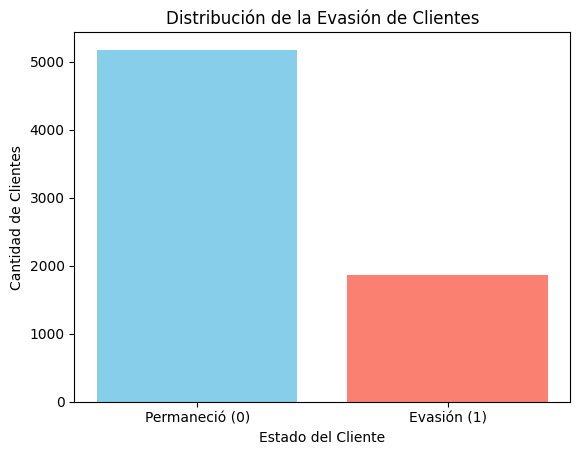

In [ ]:
plt.bar(etiquetas, valores, color=['skyblue', 'salmon'])
plt.title('Distribución de la Evasión de Clientes')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.savefig('distribucion_evasion.png')

In [ ]:
plt.savefig('distribucion_evasion.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
distribucion_contrato = datos.groupby('account.Contract')['churn'].value_counts().unstack()

In [ ]:
distribucion_contrato

churn,0,1
account.Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


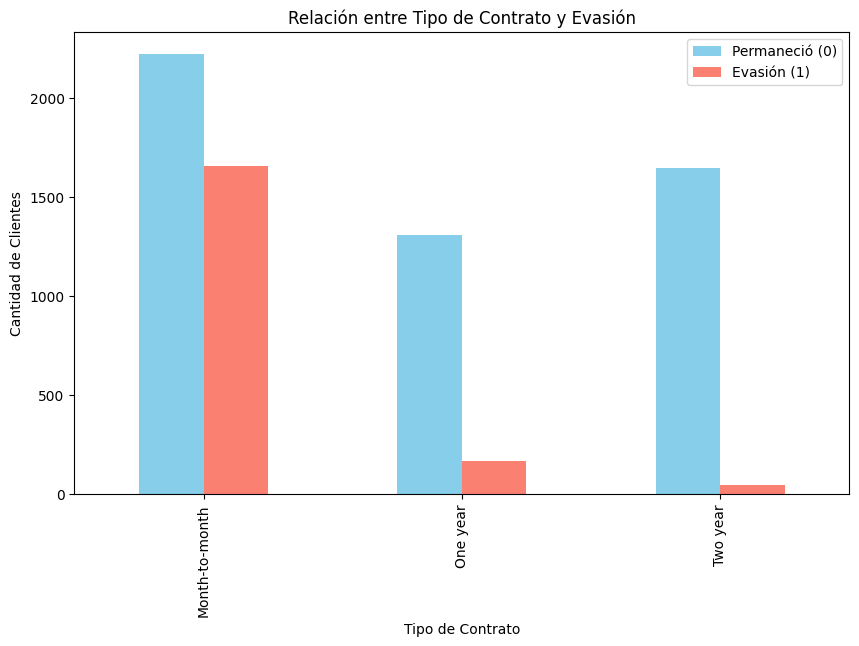

In [ ]:
distribucion_contrato.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Relación entre Tipo de Contrato y Evasión')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(['Permaneció (0)', 'Evasión (1)'])
plt.savefig('evasion_por_contrato.png')

In [ ]:
metodo_pago = datos.groupby('account.PaymentMethod')['churn'].value_counts().unstack()
metodo_pago

churn,0,1
account.PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


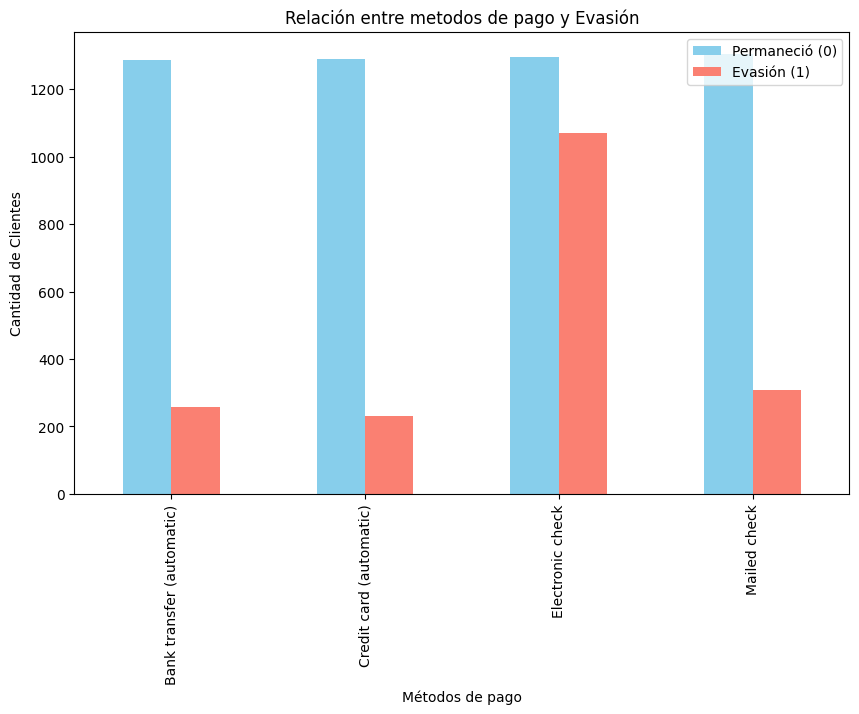

In [ ]:
metodo_pago.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Relación entre metodos de pago y Evasión')
plt.xlabel('Métodos de pago')
plt.ylabel('Cantidad de Clientes')
plt.legend(['Permaneció (0)', 'Evasión (1)'])
plt.savefig('metodos_de_pago.png')

In [ ]:
evasion_por_genero = datos.groupby('customer.gender')['churn'].value_counts().unstack()

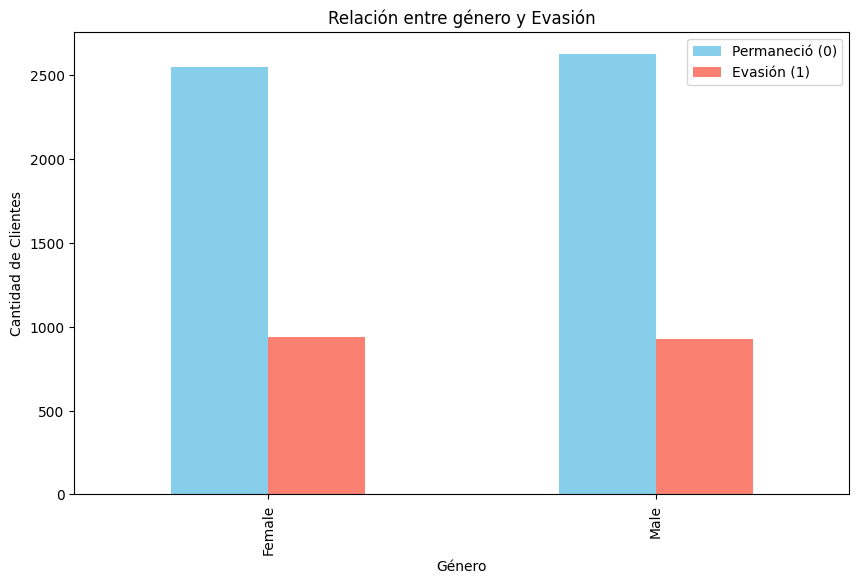

In [ ]:
evasion_por_genero.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Relación entre género y Evasión')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(['Permaneció (0)', 'Evasión (1)'])
plt.savefig('Genero_y_evasion.png')

In [ ]:
analisis_numerico = datos.groupby('churn')[['customer.tenure', 'account.Charges.Monthly']].mean()
analisis_numerico

,customer.tenure,account.Charges.Monthly
churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [ ]:
import matplotlib.pyplot as plt

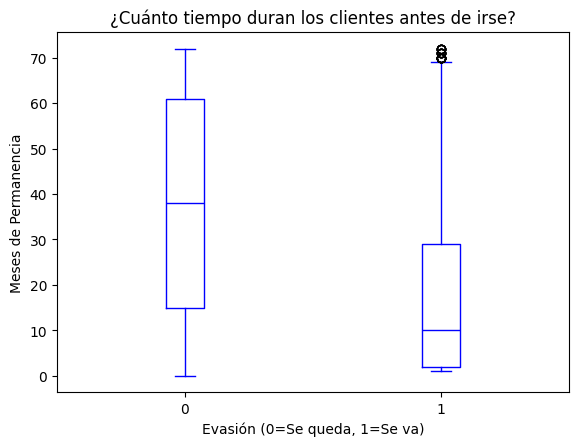

In [ ]:
datos.boxplot(column='customer.tenure', by='churn', grid=False, color='blue')
plt.title('¿Cuánto tiempo duran los clientes antes de irse?')
plt.suptitle('')
plt.xlabel('Evasión (0=Se queda, 1=Se va)')
plt.ylabel('Meses de Permanencia')
plt.savefig('permanencia_boxplot.png')

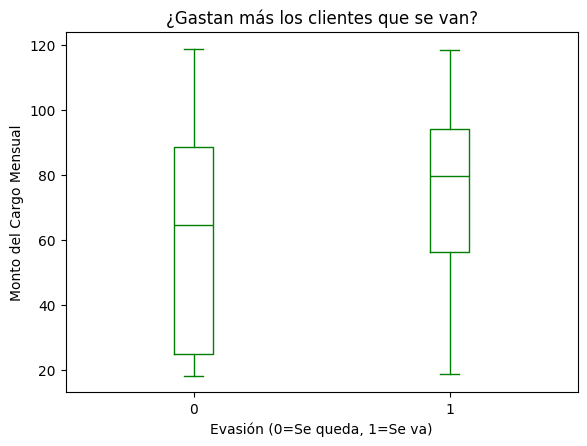

In [ ]:
datos.boxplot(column='account.Charges.Monthly', by='churn', grid=False, color='green')
plt.title('¿Gastan más los clientes que se van?')
plt.suptitle('')
plt.xlabel('Evasión (0=Se queda, 1=Se va)')
plt.ylabel('Monto del Cargo Mensual')
plt.savefig('cargos_boxplot.png')

In [ ]:
se_quedan = datos[datos['churn'] == 0]['customer.tenure']
se_van = datos[datos['churn'] == 1]['customer.tenure']

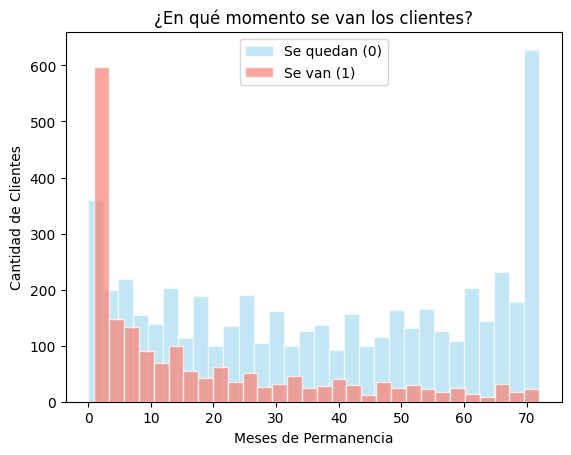

In [ ]:
plt.hist(se_quedan, bins=30, alpha=0.5, label='Se quedan (0)', color='skyblue', edgecolor='white')
plt.hist(se_van, bins=30, alpha=0.7, label='Se van (1)', color='salmon', edgecolor='white')

plt.title('¿En qué momento se van los clientes?')
plt.xlabel('Meses de Permanencia')
plt.ylabel('Cantidad de Clientes')
plt.legend()
plt.savefig('histograma_permanencia.png')

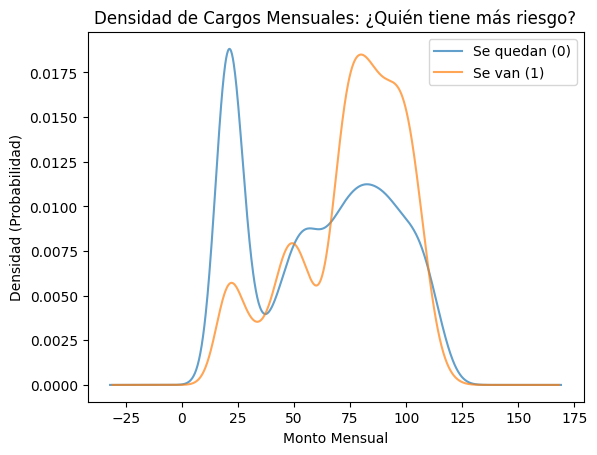

In [ ]:
datos.groupby('churn')['account.Charges.Monthly'].plot(kind='kde', alpha=0.7)

plt.title('Densidad de Cargos Mensuales: ¿Quién tiene más riesgo?')
plt.xlabel('Monto Mensual')
plt.ylabel('Densidad (Probabilidad)')
plt.legend(['Se quedan (0)', 'Se van (1)'])
plt.savefig('densidad_cargos.png')

#📄Informe final

#### El objetivo de este proyecto fue identificar los factores que impulsan la evasión de clientes (Churn). Se analizó una base de datos de 7,043 clientes para detectar patrones de comportamiento y proponer soluciones estratégicas.

#### Se realizó un proceso de limpieza de la información:

Importación: Se cargaron datos desde un formato JSON anidado, normalizándolos en una estructura de tabla.

Corrección de Tipos: Transformé las columnas de texto a número (float64), manejando errores y rellenando vacíos con 0.

Tratamiento de Nulos: Identifiqué y eliminé 224 registros que tenían el campo de "Evasión" vacío, ya que sin ese dato el análisis perdería eficacia.

Estandarización: Convertí las respuestas categóricas (Yes/No) en valores binarios (1/0) usando funciones Lambda y el método .map().

Gráficas: Creé varias gráficas para visualizar el comportamiento del cliente y sus fugas en base a lo gastado y su duración en el tiempo.


#### Mediante visualizaciones, se descubrieron los patrones del cliente que se va de la empresa:

Distribución General: Aproximadamente el 26.5% de la base de clientes ha abandonado la compañía.

Existe una "Zona Crítica" en los primeros 12 meses. Los clientes nuevos tienen una tasa de fuga altísima comparada con los veteranos. Además, los clientes que pagan más de $70.00 mensuales (planes premium o con muchos adicionales) muestran una mayor tendencia a la evasión.

#### **Conclusiones:**
El tiempo del Contrato es Clave: Los clientes con contratos "Mes a mes" son los principales responsables de la evasión, ya que no tienen compromiso a largo plazo, facilitando la salida.

Precio: Los usuarios que pagan con Cheque Electrónico y tienen cargos mensuales altos son los más propensos a irse, posiblemente atraídos por ofertas de la competencia.

Fidelización: Una vez que un cliente supera los 24 meses de permanencia, su probabilidad de irse cae drásticamente.



#### **Recomendaciones**
Incentivar el Contrato Anual: Crear promociones para migrar a los clientes de "Mes a mes" a contratos de uno o dos años.

Plan de Bienvenida: Implementar un programa de atención especial y descuentos durante los primeros 6 meses de vida del cliente.

Revisión de las tarifas más caras: Analizar si los clientes que pagan más de $70 están recibiendo un valor percibido acorde o si se sienten sobrecargados, ofreciéndoles beneficios adicionales.